In [1]:
# packages
import pandas as pd
import numpy as np
import os
import os.path
import seaborn as sns
import matplotlib
import geopy.distance
from matplotlib import pyplot as plt

Notice: The modeled data only contains one point. Good to do it again but with a zone

In [2]:
# functions

def import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA(climate_var, unit):
    # import data
    
    path_NEX_GDDP_CMIP6_EmplacementStation=os.path.join(r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file',climate_var,climate_var+'_'+unit+'_day_1970-2014_closest_point_to_NOAA','NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_'+climate_var+'_1970-2014_projectsMoz.csv')
    
    data_NEX_GDDP_CMIP6_EmplacementStation = pd.read_csv(path_NEX_GDDP_CMIP6_EmplacementStation)
    
    data_NEX_GDDP_CMIP6_EmplacementStation = add_year_month_season(data_NEX_GDDP_CMIP6_EmplacementStation,'Date')
    
    return data_NEX_GDDP_CMIP6_EmplacementStation

In [3]:
def treat_NOAA_data(daily_sum_obs_from_NOAA):
    
    daily_sum_obs_from_NOAA = add_year_month_season(daily_sum_obs_from_NOAA,'DATE')
    
    daily_sum_obs_from_NOAA = daily_sum_obs_from_NOAA[daily_sum_obs_from_NOAA['Year'].between(1970,2014)]
    
    daily_sum_obs_from_NOAA=count_na_in_df_NOAA(daily_sum_obs_from_NOAA,'PRCP')
    daily_sum_obs_from_NOAA=count_na_in_df_NOAA(daily_sum_obs_from_NOAA,'TAVG')
    daily_sum_obs_from_NOAA=count_na_in_df_NOAA(daily_sum_obs_from_NOAA,'TMAX')
    daily_sum_obs_from_NOAA=count_na_in_df_NOAA(daily_sum_obs_from_NOAA,'TMIN')
    
    return daily_sum_obs_from_NOAA

In [4]:
def count_na_in_df_NOAA(df,name_col):
    df[name_col+' MISSING']=0
    df[name_col+' MISSING'][df[name_col].isna()]=1
    return df

In [5]:
def select_station(daily_sum_obs_from_NOAA,name_station):
    daily_sum_obs_from_NOAA_name_station = daily_sum_obs_from_NOAA[daily_sum_obs_from_NOAA['NAME']==name_station]
    return daily_sum_obs_from_NOAA_name_station

In [6]:
def add_year_month_season(df,column_date):
    # add Year, month and season columns for graphs
    Year = df[[column_date]].values.reshape(len(df[[column_date]].values),)
    Month = df[[column_date]].values.reshape(len(df[[column_date]].values),)
    Season = df[[column_date]].values.reshape(len(df[[column_date]].values),)
    
    if str(Year[1]).find('-')==2:
        for i in np.arange(0,len(df[[column_date]].values)):
            Year[i]=int(Year[i][6:10])
            Month[i]=int(Month[i][3:5])
            if Month[i]>3 and Month[i]<10: # dry season in Mozambique is between April and September
                Season[i]='Dry'
            else:# humid season is between October and March
                Season[i]='Humid'
            
            Month[i]=str_month(Month[i])
            
    if str(Year[1]).find('-')==4:
        for i in np.arange(0,len(df[[column_date]].values)):
            Year[i]=int(Year[i][0:4])
            Month[i]=int(Month[i][5:7])
            if Month[i]>3 and Month[i]<10: # dry season in Mozambique is between April and September
                Season[i]='Dry'
            else:# humid season is between October and March
                Season[i]='Humid'
            
            Month[i]=str_month(Month[i])
                
    df['Year'] = Year
    df['Month'] = Month
    df['Season'] = Season
    return df

In [7]:
def str_month(int_m):
    if int_m==1:
        str_m = 'Jan'
    if int_m==2:
        str_m = 'Feb'    
    if int_m==3:
        str_m = 'Mar'
    if int_m==4:
        str_m = 'Apr'
    if int_m==5:
        str_m = 'May'
    if int_m==6:
        str_m = 'Jun'
    if int_m==7:
        str_m = 'Jul'
    if int_m==8:
        str_m = 'Aug'    
    if int_m==9:
        str_m = 'Sep'
    if int_m==10:
        str_m = 'Oct'
    if int_m==11:
        str_m = 'Nov'
    if int_m==12:
        str_m = 'Dec'
    return str_m

In [8]:
def compare_2_lines(data_1,data_2,y_name,x_name='Year',tuple_error_bar=('pi',80)):
    
    fig,ax=plt.subplots()
    plt.tight_layout() # Adjust the padding between and around subplots.

    sns.lineplot(data=pr_historic_modeled_NEXGDDPCMIP6_gorongosa.groupby(['Experiment','Model','Year'])[['Mean of the daily precipitation rate mm_per_day']].mean(),x='Year', y='Mean of the daily precipitation rate mm_per_day',hue='Model',errorbar=tuple_error_bar,ax=ax)
    sns.lineplot(data=pr_obs_gorongosa_from_gorongosa.groupby('Year')[['Mean of the daily precipitation rate mm_per_day']].mean(),x='Year', y='Mean of the daily precipitation rate mm_per_day',color='black',label='Observation from Gorongosa',errorbar=tuple_error_bar,ax=ax)
    
    # display the legend
    handles, labels=ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.38, 0.88),title='Legend')
    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    plt.title('Modeled NEX-GDDP-CMIP6 yearly average precipitation accross time at Gorongosa,\n compared to observed yearly average temperature from gorongosa, between '+str(start_year_hist)+' and '+str(stop_year_hist))
    path_figure=r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures\Comp_hist_m_o_pr.png'
    plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written
    plt.show()

In [9]:
def compare_3_lines(title_fig,title_x_axis,clim_var,data_1,name_col_1,data_2,name_col_2,source_2,y_name,name_station,x_name='Year',tuple_error_bar=('pi',80),start_year_hist=1970,stop_year_hist=2014):
    
    fig,ax=plt.subplots()
    plt.tight_layout() # Adjust the padding between and around subplots.

    sns.lineplot(data=data_1.groupby(['Experiment','Model','Year'])[[name_col_1]].mean(),x='Year', y=name_col_1,hue='Model',errorbar=tuple_error_bar,ax=ax)
    sns.lineplot(data=data_2.groupby('Year')[[name_col_2]].mean(),x='Year', y=name_col_2,color='black',label='Observation from '+source_2,errorbar=tuple_error_bar,ax=ax)
    
    ax2 = ax.twinx()
    sns.lineplot(data=data_2.groupby('Year')[[name_col_2+' MISSING']].sum(),x='Year',y=name_col_2+' MISSING',color='red',label='Missing value',ax=ax2)
    
    # display the legend
    handles, labels=ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.4, 0.88),title='Legend')
    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    ax.set_ylabel('Yearly average '+name_col_1)
    ax2.set_ylabel('Number of missing data in '+source_2+' dataset')
    
    plt.title('Modeled NEX-GDDP-CMIP6 yearly average '+clim_var+' accross time at '+name_station+',\n compared to observed yearly average '+clim_var+' from '+source_2+', between '+str(start_year_hist)+' and '+str(stop_year_hist))
    path_figure=os.path.join(r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures',title_fig+'.png')
    plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written
    plt.show()

In [10]:
def boxplots_(climate_var,df1,name_col1,df2,name_col2,name_station):
    
    df2['Model']='Observation NOAA'
    df2=df2.rename(columns={name_col2:name_col1})
    
    df_boxplot=pd.concat([df2,df1])

    
    fig,ax=plt.subplots()
    plt.tight_layout() # Adjust the padding between and around subplots.
    cols = ['pink' if (x =='Observation NOAA') else 'skyblue' for x in df_boxplot.Model.drop_duplicates().values]
    sns.boxplot(data=df_boxplot,x=df_boxplot.Model, y=name_col1,palette=cols,whis=[10,90],ax=ax)

    # display the legend
    #handles, labels=ax.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.3, 1),title='Legend')
    #ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.title('Compare observation for '+climate_var+' from NOAA,with modeled data\nby NEX-GDDP-CMIP6 between 1970 to 2014 at '+name_station)

    path_figure=r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures\testBoxplotObs.png'
    plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written

    plt.show()

# Import data

## Observations data

### Precipitation and temperature NOAA

In [11]:
path = r'C:\Users\CLMRX\COWI\A248363 - Climate analysis - Documents\General\CRVA_tool\Master_thesis\Project\3 - Implementation\1 - Data\1-BC\NOAA-ClimateDataOnline\3370204.csv'
daily_sum_obs_from_NOAA = pd.read_csv(path)

In [12]:
daily_sum_obs_from_NOAA=treat_NOAA_data(daily_sum_obs_from_NOAA) # add Year Month, and count Nan, select between 1970 and 2014

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_33928\1741400354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name_col+' MISSING']=0
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_33928\1741400354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name_col+' MISSING'][df[name_col].isna()]=1
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_33928\1741400354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [13]:
daily_sum_obs_from_NOAA_BEIRA=select_station(daily_sum_obs_from_NOAA,'BEIRA, MZ')

In [14]:
daily_sum_obs_from_NOAA_PEMBA=select_station(daily_sum_obs_from_NOAA,'PEMBA, MZ')

In [15]:
daily_sum_obs_from_NOAA_CHIMOIO=select_station(daily_sum_obs_from_NOAA,'CHIMOIO, MZ')

### Precipitation from Gorongosa 

In [16]:
path = r'C:\Users\CLMRX\COWI\A248363 - Climate analysis - Documents\General\CRVA_tool\Master_thesis\Project\3 - Implementation\1 - Data\1-BC\DirecltyfromMoz\Precipitation_Gorongosa_reformat.csv'
pr_obs_gorongosa_from_gorongosa = pd.read_csv(path)
pr_obs_gorongosa_from_gorongosa=add_year_month_season(pr_obs_gorongosa_from_gorongosa,'time')
pr_obs_gorongosa_from_gorongosa['pr'][pr_obs_gorongosa_from_gorongosa['pr']=='s/i'] = pr_obs_gorongosa_from_gorongosa['pr'].iloc[0]
pr_obs_gorongosa_from_gorongosa['pr'] = pr_obs_gorongosa_from_gorongosa['pr'].astype(float)
pr_obs_gorongosa_from_gorongosa

,time,pr,Year,Month,Season
0,1980-01-01,NaN,1980,Jan,Humid
1,1980-01-02,NaN,1980,Jan,Humid
2,1980-01-03,NaN,1980,Jan,Humid
3,1980-01-04,NaN,1980,Jan,Humid
4,1980-01-05,NaN,1980,Jan,Humid
...,...,...,...,...,...
14971,2020-12-27,2.7,2020,Dec,Humid
14972,2020-12-28,0.0,2020,Dec,Humid
14973,2020-12-29,0.0,2020,Dec,Humid
14974,2020-12-30,138.4,2020,Dec,Humid


## MODELED DATA

### Precipitation NEX-GDDP-CMIP6

In [74]:
# to compare historic modelisaiton with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1970-2014_CLosest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_pr_1970-2014_projectsMoz.csv'
pr_model_NEX_GDDPCMIP6_to_comp_NOAA = pd.read_csv(path)
pr_model_NEX_GDDPCMIP6_to_comp_NOAA=add_year_month_season(pr_model_NEX_GDDPCMIP6_to_comp_NOAA,'Date')
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO = pr_model_NEX_GDDPCMIP6_to_comp_NOAA[pr_model_NEX_GDDPCMIP6_to_comp_NOAA['Name station']=='CHIMOIO, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA = pr_model_NEX_GDDPCMIP6_to_comp_NOAA[pr_model_NEX_GDDPCMIP6_to_comp_NOAA['Name station']=='PEMBA, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA = pr_model_NEX_GDDPCMIP6_to_comp_NOAA[pr_model_NEX_GDDPCMIP6_to_comp_NOAA['Name station']=='BEIRA, MZ']

In [76]:
# to compare projections with NOAA observation data
path2 = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1950-2100\pr_1950-2100_projectsMoz.csv'
pr_model_NEX_GDDPCMIP6_to_comp_NOAA2 = pd.read_csv(path2)
pr_model_NEX_GDDPCMIP6_to_comp_NOAA2=add_year_month_season(pr_model_NEX_GDDPCMIP6_to_comp_NOAA2,'Date')
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO2 = pr_model_NEX_GDDPCMIP6_to_comp_NOAA2[pr_model_NEX_GDDPCMIP6_to_comp_NOAA2['Name project']=='CHIMOIO, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA2 = pr_model_NEX_GDDPCMIP6_to_comp_NOAA2[pr_model_NEX_GDDPCMIP6_to_comp_NOAA2['Name project']=='PEMBA, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project = pr_model_NEX_GDDPCMIP6_to_comp_NOAA2[pr_model_NEX_GDDPCMIP6_to_comp_NOAA2['Name project']=='WTP_Mutua_EIB']

In [20]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA2 = pr_model_NEX_GDDPCMIP6_to_comp_NOAA2[pr_model_NEX_GDDPCMIP6_to_comp_NOAA2['Name project']=='WTP_Mutua_EIB']

### Temperature NEX-GDDP-CMIP6

In [30]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tas\tas_Celsius_day_1970-2014_closest_point_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tas_1970-2014_projectsMoz.csv'
tas_model_NEX_GDDPCMIP6_to_comp_NOAA = pd.read_csv(path)
tas_model_NEX_GDDPCMIP6_to_comp_NOAA=add_year_month_season(tas_model_NEX_GDDPCMIP6_to_comp_NOAA,'Date')
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO = tas_model_NEX_GDDPCMIP6_to_comp_NOAA[tas_model_NEX_GDDPCMIP6_to_comp_NOAA['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA = tas_model_NEX_GDDPCMIP6_to_comp_NOAA[tas_model_NEX_GDDPCMIP6_to_comp_NOAA['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA = tas_model_NEX_GDDPCMIP6_to_comp_NOAA[tas_model_NEX_GDDPCMIP6_to_comp_NOAA['Name station']=='BEIRA, MZ']

### Temperature maximum NEX-GDDP-CMIP6

In [31]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmax\tasmax_Celsius_day_1970-2014_closest_point_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmax_1970-2014_projectsMoz.csv'
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA = pd.read_csv(path)
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA=add_year_month_season(tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA,'Date')
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA['Name station']=='BEIRA, MZ']

In [32]:
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA

,Name station,Experiment,Model,Latitude,Longitude,Date,Daily Maximum Near-Surface Air Temperature °C,Year,Month,Season
460208,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,01-01-1970,30.036713,1970,Jan,Humid
460209,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,02-01-1970,30.373505,1970,Jan,Humid
460210,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,03-01-1970,31.742554,1970,Jan,Humid
460211,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,04-01-1970,31.841827,1970,Jan,Humid
460212,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,05-01-1970,30.454987,1970,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...
690307,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,27-12-2014,35.337708,2014,Dec,Humid
690308,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,28-12-2014,34.965546,2014,Dec,Humid
690309,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,29-12-2014,36.526917,2014,Dec,Humid
690310,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,30-12-2014,37.756683,2014,Dec,Humid


# Compare NOAA station with NEX-GDDP-CMIP6 data at the same emplacement

## Temperature

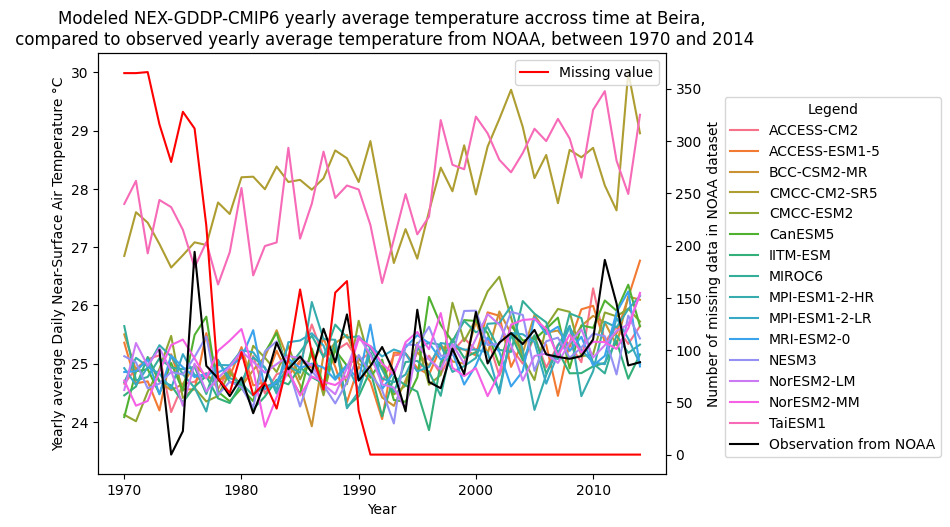

In [33]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_33928\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


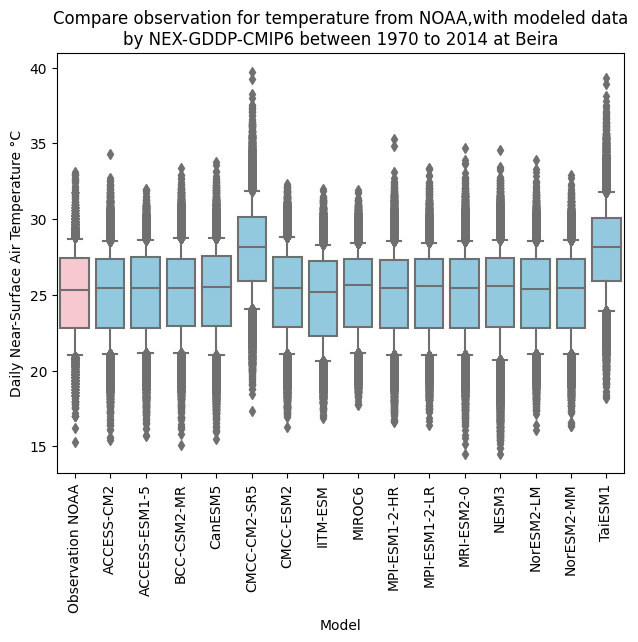

In [34]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','Beira')

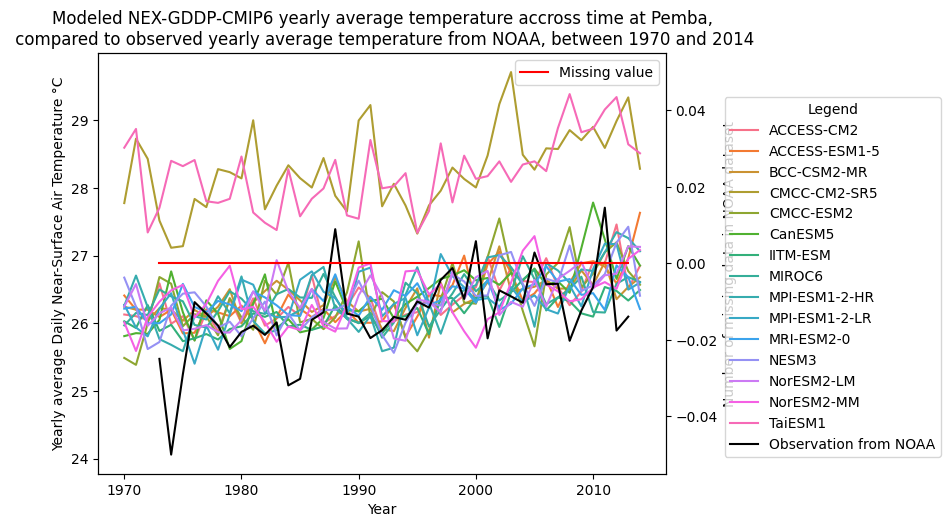

In [35]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','NOAA','Annual mean daily temperature °C','Pemba')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_33928\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


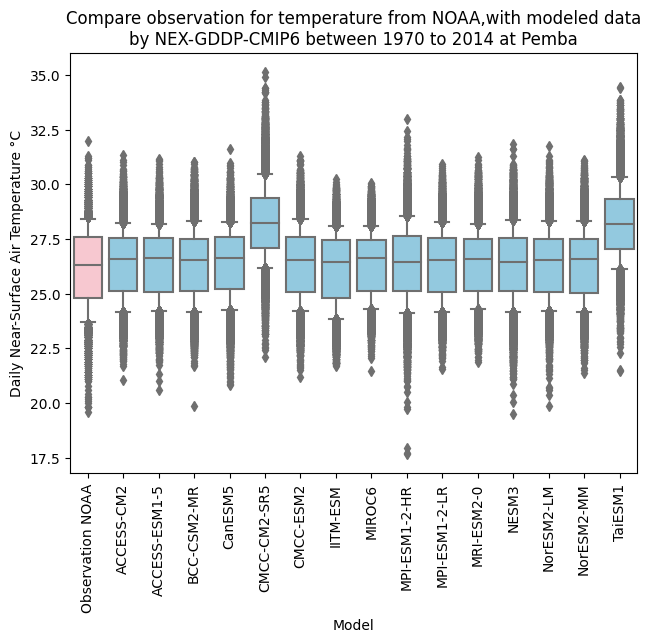

In [36]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','Pemba')

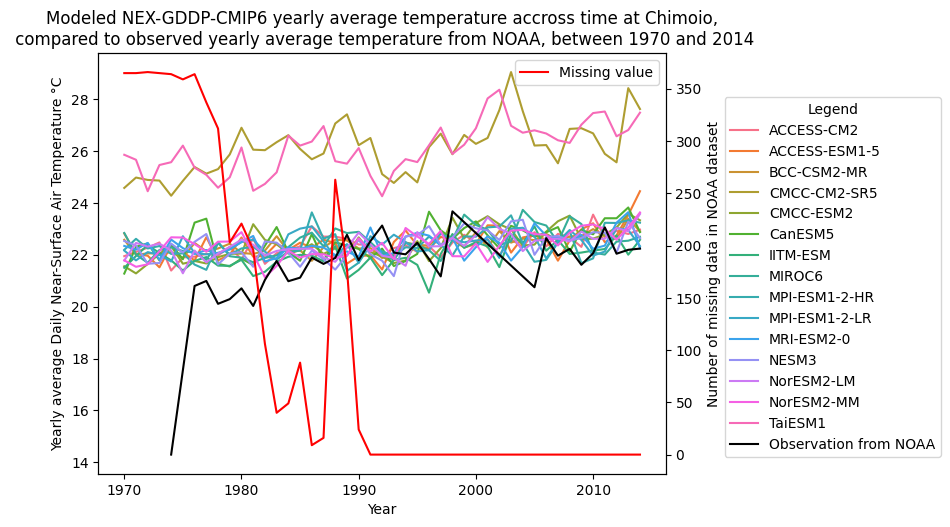

In [37]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_33928\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


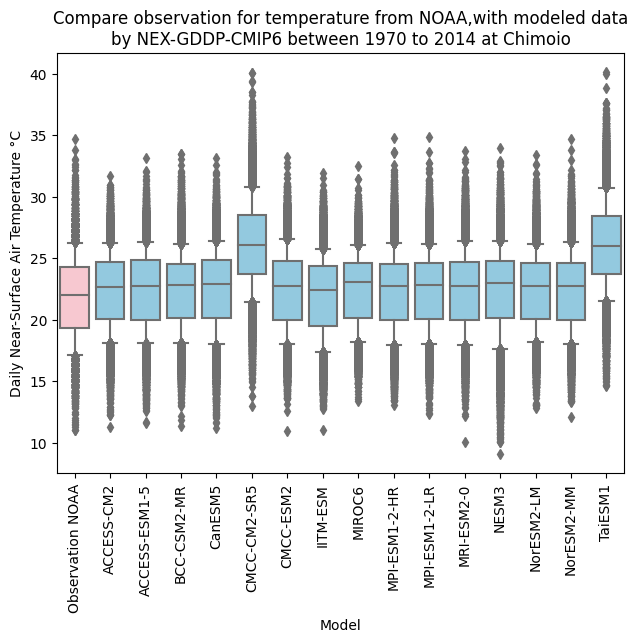

In [38]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','Chimoio')

## Maximum temperature

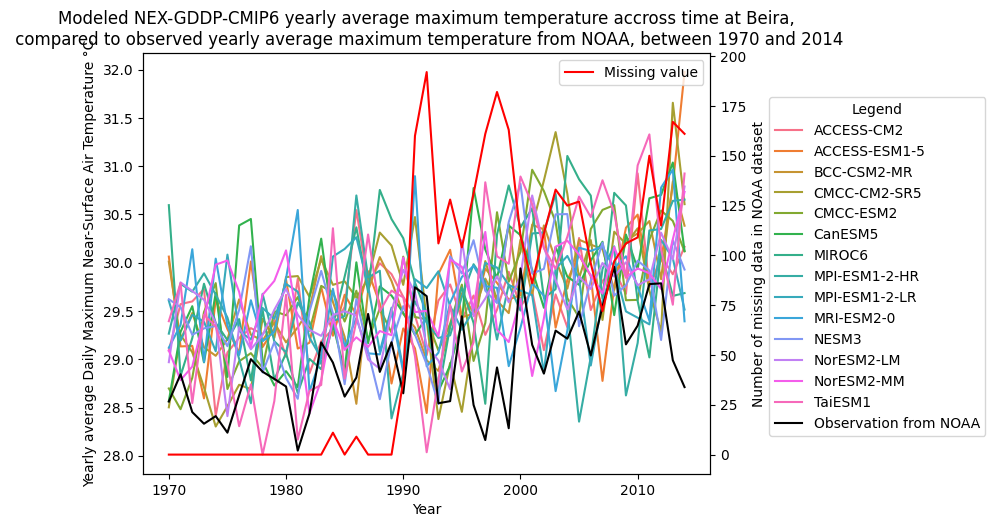

In [39]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','NOAA','Annual mean maximum daily temperature °C','Beira')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_33928\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


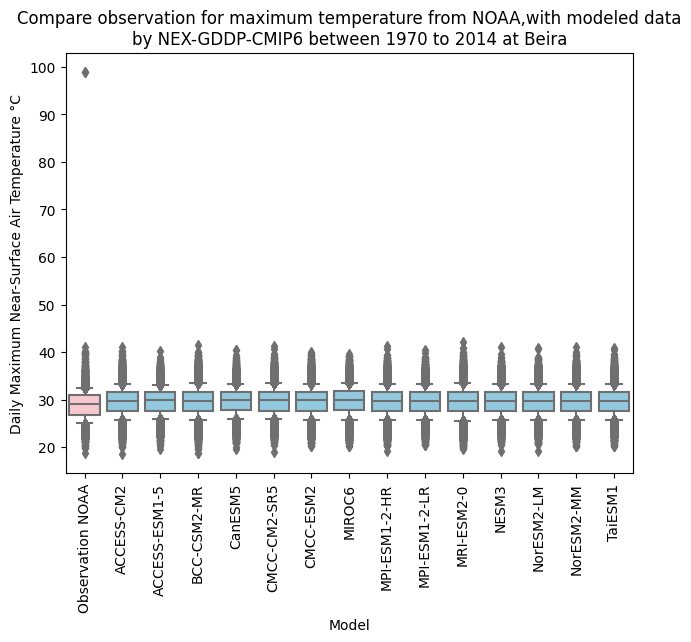

In [40]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','Beira')

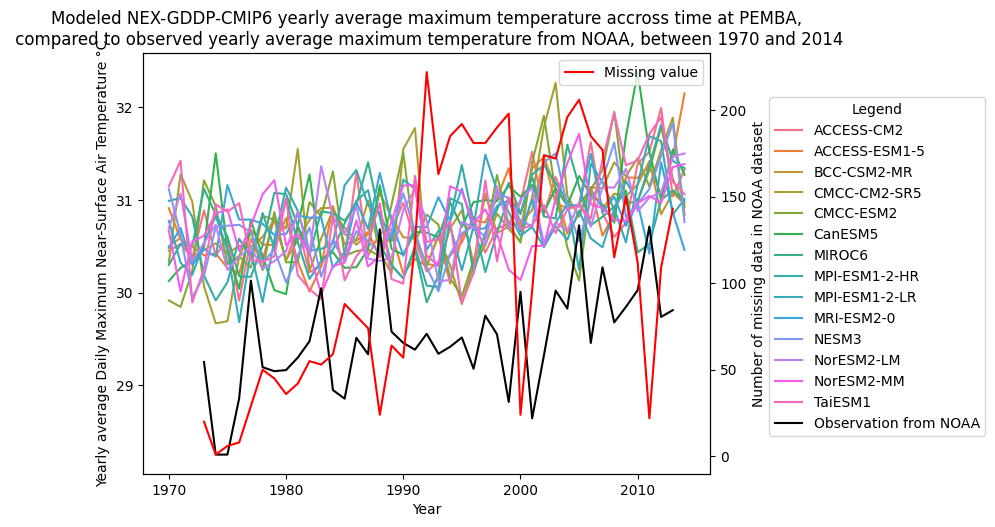

In [41]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','NOAA','Annual mean maximum daily temperature °C','PEMBA')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_33928\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


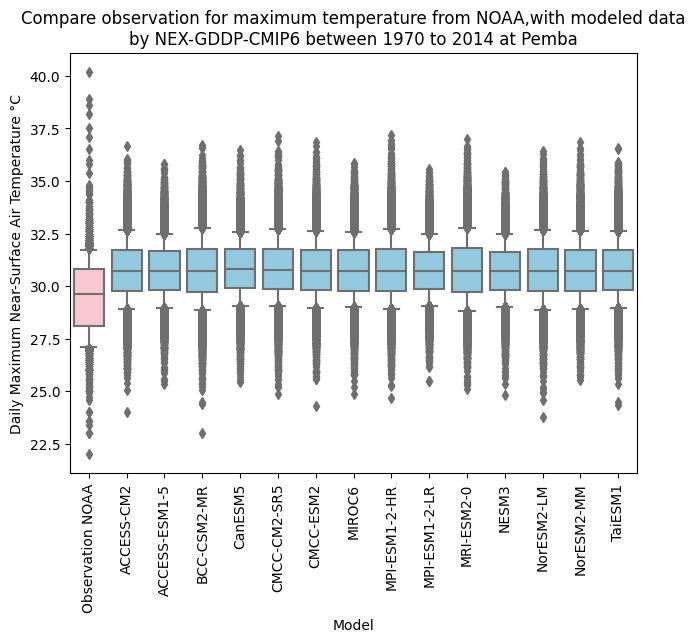

In [42]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','Pemba')

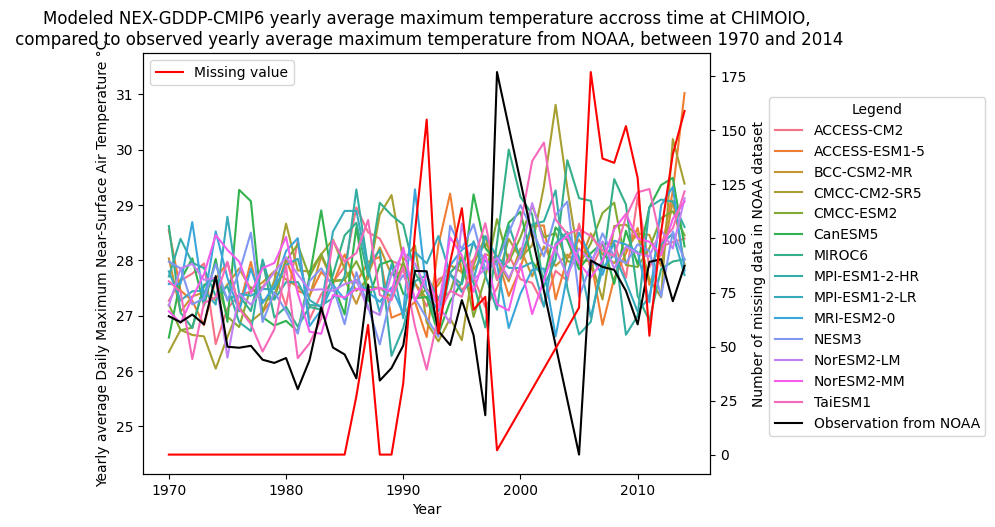

In [43]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','NOAA','Annual mean maximum daily temperature °C','CHIMOIO')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_33928\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


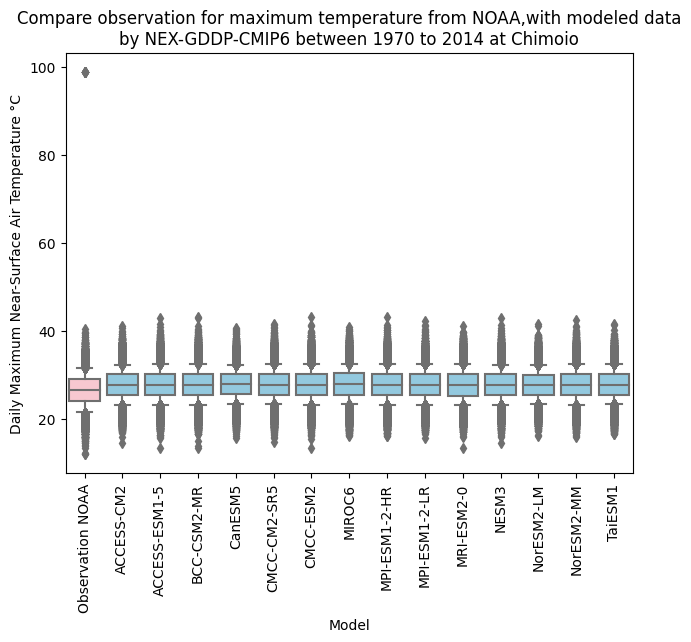

In [44]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','Chimoio')

## Precipitation

In [45]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_BEIRA,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Beira')

NameError: name 'pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA' is not defined

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_BEIRA,'PRCP','Beira')

In [ ]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_PEMBA,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Pemba')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_PEMBA,'PRCP','Pemba')

In [ ]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Chimoio')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','Chimoio')

those graphs confirm that for precipitation and maximum temperature, no need to kill a model. But, for temperature, need to kill 'TAIESM1' and 'CMCC-CM2-SR5'

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA = tas_model_NEX_GDDPCMIP6_to_comp_NOAA[tas_model_NEX_GDDPCMIP6_to_comp_NOAA['Model']!='TaiESM1']

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA = tas_model_NEX_GDDPCMIP6_to_comp_NOAA[tas_model_NEX_GDDPCMIP6_to_comp_NOAA['Model']!='CMCC-CM2-SR5']

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO = tas_model_NEX_GDDPCMIP6_to_comp_NOAA[tas_model_NEX_GDDPCMIP6_to_comp_NOAA['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA = tas_model_NEX_GDDPCMIP6_to_comp_NOAA[tas_model_NEX_GDDPCMIP6_to_comp_NOAA['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA = tas_model_NEX_GDDPCMIP6_to_comp_NOAA[tas_model_NEX_GDDPCMIP6_to_comp_NOAA['Name station']=='BEIRA, MZ']

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','Beira')

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','NOAA','Annual mean daily temperature °C','Pemba')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','Pemba')

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','CHIMOIO')

# Return period

In [ ]:
#### Data from Gorongosa

In [ ]:
def dataframe_threshold_coresponding_to_return_period_obs(df):
    df_copy=df.copy(deep=True)
    df_copy=df_copy.drop(labels='Date',axis=1)
    df_max = df_copy.groupby(['Name project','Experiment','Model','Year']).max() # maximum    
    midx = pd.MultiIndex.from_product([list(set(df_copy[df_copy.columns[0]])),list(set(df_copy[df_copy.columns[1]])),list(set(df_copy[df_copy.columns[2]]))],names=['Name project','Experiment', 'Model'])
    cols = ['Value for return period 50 years mm/day','Value for return period 100 years mm/day']
    return_period = pd.DataFrame(data = [], 
                                index = midx,
                                columns = cols)
    for name_p in return_period.index.levels[0].tolist():
        for ssp in return_period.index.levels[1].tolist():
            for model in return_period.index.levels[2].tolist():
                print('Name project '+name_p+ ' ssp '+ssp+ ' model '+model)
                Z=df_max.loc[(name_p,ssp,model)]['Mean of the daily precipitation rate mm_per_day'].values.reshape(len(df_max.loc[(name_p,ssp,model)]['Mean of the daily precipitation rate mm_per_day']),)
                (loc1,scale)=stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
                # choice of gumbel because suits to extreme precipitation
                return_period.loc[(name_p,ssp,model),('Value for return period 50 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,50)
                return_period.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,100)
                
    return return_period

In [ ]:
def threshold_coresponding_to_return_period(loc,scale,T):
    p_non_exceedance = 1 - (1/T)
    try:
        threshold_coresponding = round(gumbel_r.ppf(p_non_exceedance,loc,scale))
    except OverflowError: # the result is not finite
        if math.isinf(gumbel_r.ppf(p_non_exceedance,loc,scale)) and gumbel_r.ppf(p_non_exceedance,loc,scale)<0:
            # ppf is the inverse of cdf
            # the result is -inf
            threshold_coresponding = 0 # the value of wero is imposed
    return threshold_coresponding

In [ ]:
import scipy
from scipy.stats import gumbel_r
from scipy.stats import gumbel_l

In [ ]:
pr_obs_gorongosa_from_gorongosa

In [ ]:
Z = pr_obs_gorongosa_from_gorongosa[pr_obs_gorongosa_from_gorongosa['Year'].between(1991,2012)].groupby('Year')[['pr']].agg(np.nanmax)#.reshape(len(pr_obs_gorongosa_from_gorongosa.groupby('Year')[['pr']].max()),)
#Z = Z[~np.isnan(Z)]
(loc1,scale1)=scipy.stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
return_per_100=threshold_coresponding_to_return_period(loc1,scale1,100)
return_per_100

In [ ]:
Z

In [ ]:
pr_obs_gorongosa_from_gorongosa['pr'].values

In [ ]:
return_per_100

In [ ]:
#### Data from NOAA, station CHIMOIO

In [ ]:
daily_sum_obs_from_NOAA_CHIMOIO

In [ ]:
Z = daily_sum_obs_from_NOAA_CHIMOIO[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1991,2012)].groupby('Year')[['PRCP']].agg(np.nanmax)#.values.reshape(len(daily_sum_obs_from_NOAA_CHIMOIO.groupby('Year')[['PRCP']].max().values),)
#Z = Z[~np.isnan(Z)]
(loc1,scale1)=scipy.stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
return_per_100=threshold_coresponding_to_return_period(loc1,scale1,100)
return_per_100

In [ ]:
Z

In [ ]:
## compare max precipitation

In [ ]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO.groupby(['Experiment','Model','Year'])['Mean of the daily precipitation rate mm/day'].agg(np.nanmax).reset_index()

In [ ]:
pr_obs_gorongosa_from_gorongosa.groupby(['Year'])['pr'].agg(np.nanmax).reset_index()

In [ ]:
sns.lineplot(data=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO.groupby(['Experiment','Model','Year'])['Mean of the daily precipitation rate mm/day'].agg(np.nanmax).reset_index(),x='Year',y='Mean of the daily precipitation rate mm/day',hue='Model')
sns.lineplot(data=pr_obs_gorongosa_from_gorongosa.groupby(['Year'])['pr'].agg(np.nanmax).reset_index(),x='Year',y='pr',color='black')

In [ ]:
from Graphs_functions import trends_month

In [ ]:
daily_sum_obs_from_NOAA_BEIRA

In [ ]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA

In [ ]:
trends_month('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA,'NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_BEIRA,'NOAA','Average','Beira',temporal_resolution='Month',start_year_line=1970,stop_year_line=2014,start_year_boxplot=2020,stop_year_boxplot=2065)

In [ ]:
# KeyError: "None of [Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',\n       'Nov', 'Dec'],\n      dtype='object', name='Month')] are in the [index]"

In [ ]:
temporal_resolution = 'Month'
title_column = 'Mean of the daily precipitation rate mm/day'

In [ ]:
data_NEXGDDPCMIP6=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA[['Experiment','Model',temporal_resolution,title_column]].groupby(['Experiment','Model',temporal_resolution])[[title_column]].mean().rename(columns={title_column:'New name'}).reset_index()


In [ ]:
data_NEXGDDPCMIP6

In [21]:
def prepare_NEX_GDDP_CMIP6(df,climate_var_longName,stats,temporal_resolution,new_name_col):
    try:
        try:
            title_column=df.filter(like=climate_var_longName, axis=1).columns[0]
        except:
            title_column=df.filter(like=climate_var_longName.capitalize(), axis=1).columns[0]
    except:
        title_column=df.filter(like=climate_var_longName.upper(), axis=1).columns[0]
    print('title_column '+title_column)
    print(df)
    if stats == 'Average':
        data_NEXGDDPCMIP6=df[['Experiment','Model',temporal_resolution,title_column]].groupby(['Experiment','Model',temporal_resolution])[[title_column]].mean().rename(columns={title_column:new_name_col}).reset_index()
        print(temporal_resolution)
        print(data_NEXGDDPCMIP6)
    if stats == 'Sum':
        data_NEXGDDPCMIP6=df[['Experiment','Model',temporal_resolution,title_column]].groupby(['Experiment','Model',temporal_resolution])[[title_column]].sum().rename(columns={title_column:new_name_col}).reset_index()
    if stats == 'Median':
        data_NEXGDDPCMIP6=df[['Experiment','Model',temporal_resolution,title_column]].groupby(['Experiment','Model',temporal_resolution])[[title_column]].median().rename(columns={title_column:new_name_col}).reset_index()
    
    if 'pr' in climate_var_longName.lower() and temporal_resolution =='Month':
        data_NEXGDDPCMIP6[new_name_col] = data_NEXGDDPCMIP6[[new_name_col]].values*30
    print(data_NEXGDDPCMIP6)
    return data_NEXGDDPCMIP6

In [ ]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA2

In [22]:
df_f=prepare_NEX_GDDP_CMIP6(pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA2.reset_index(),'precipitation','Average','Month','New name')
df_f

title_column Mean of the daily precipitation rate mm_per_day
           index   Name project  Experiment       Model  Latitude  Longitude  \
0              0  WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
1              1  WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
2              2  WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
3              3  WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
4              4  WTP_Mutua_EIB  historical  ACCESS-CM2   -19.375     34.625   
...          ...            ...         ...         ...       ...        ...   
2240770  2240770  WTP_Mutua_EIB      ssp370     TaiESM1   -19.375     34.625   
2240771  2240771  WTP_Mutua_EIB      ssp370     TaiESM1   -19.375     34.625   
2240772  2240772  WTP_Mutua_EIB      ssp370     TaiESM1   -19.375     34.625   
2240773  2240773  WTP_Mutua_EIB      ssp370     TaiESM1   -19.375     34.625   
2240774  2240774  WTP_Mutua_EIB      ssp370     TaiESM1   -

,Experiment,Model,Month,New name
0,historical,ACCESS-CM2,Apr,96.214131
1,historical,ACCESS-CM2,Aug,28.188441
2,historical,ACCESS-CM2,Dec,205.849081
3,historical,ACCESS-CM2,Feb,250.132912
4,historical,ACCESS-CM2,Jan,231.161815
...,...,...,...,...
895,ssp585,TaiESM1,Mar,231.517019
896,ssp585,TaiESM1,May,61.732667
897,ssp585,TaiESM1,Nov,65.101083
898,ssp585,TaiESM1,Oct,24.445362


In [23]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data_boxplot=df_f.reset_index().set_index('Month').loc[month_order].reset_index()

In [24]:
data_boxplot=data_boxplot.rename(columns={'New name':'Average monthly precipitation mm/month'})

In [25]:
data_line = daily_sum_obs_from_NOAA_BEIRA[['PRCP','Month']].groupby('Month').mean().rename(columns={'PRCP':'Average monthly precipitation mm/month'}).reset_index()
data_line['Average monthly precipitation mm/month'] = data_line[['Average monthly precipitation mm/month']].values*30
data_line=data_line.reset_index().set_index('Month').loc[month_order].reset_index()   

In [46]:
daily_sum_obs_from_NOAA_BEIRA

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,...,TMIN,TMIN_ATTRIBUTES,Year,Month,Season,PRCP MISSING,TAVG MISSING,TMAX MISSING,TMIN MISSING,Model
145008,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,1970-01-01,0.0,",,Q",NaN,NaN,...,23.8,",,Q",1970,Jan,Humid,0,1,0,0,Observation NOAA
145009,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,1970-01-02,0.0,",,Q",NaN,NaN,...,25.2,",,Q",1970,Jan,Humid,0,1,0,0,Observation NOAA
145010,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,1970-01-03,0.0,",,Q",NaN,NaN,...,26.2,",,Q",1970,Jan,Humid,0,1,0,0,Observation NOAA
145011,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,1970-01-04,2.5,",,Q",NaN,NaN,...,25.0,",,Q",1970,Jan,Humid,0,1,0,0,Observation NOAA
145012,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,1970-01-05,10.3,",,Q",NaN,NaN,...,24.6,",,Q",1970,Jan,Humid,0,1,0,0,Observation NOAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159722,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,2014-12-27,NaN,NaN,30.8,"H,,S",...,NaN,NaN,2014,Dec,Humid,1,0,1,1,Observation NOAA
159723,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,2014-12-28,NaN,NaN,30.0,"H,,S",...,NaN,NaN,2014,Dec,Humid,1,0,1,1,Observation NOAA
159724,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,2014-12-29,NaN,NaN,28.0,"H,,S",...,NaN,NaN,2014,Dec,Humid,1,0,1,1,Observation NOAA
159725,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,2014-12-30,NaN,NaN,25.6,"H,,S",...,NaN,NaN,2014,Dec,Humid,1,0,1,1,Observation NOAA


In [26]:
def boxplots_line(data_boxplot,data_line,x_axis,y_axis,source_line,title_plot,categories='Experiment'):
    fig,ax=plt.subplots()
    sns.boxplot(data=data_boxplot, x=x_axis, y=y_axis, hue=categories,ax=ax)
    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    sns.lineplot(data=data_line,x=x_axis, y=y_axis,ax=ax,label=source_line)
    
    # display the common legend for the line and boxplots
    handles, labels=ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.2, 0.5),title='Legend')
    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    plt.title(title_plot)
    path_figure=os.path.join(r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures','trend_month.png')
    plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written

    plt.show()

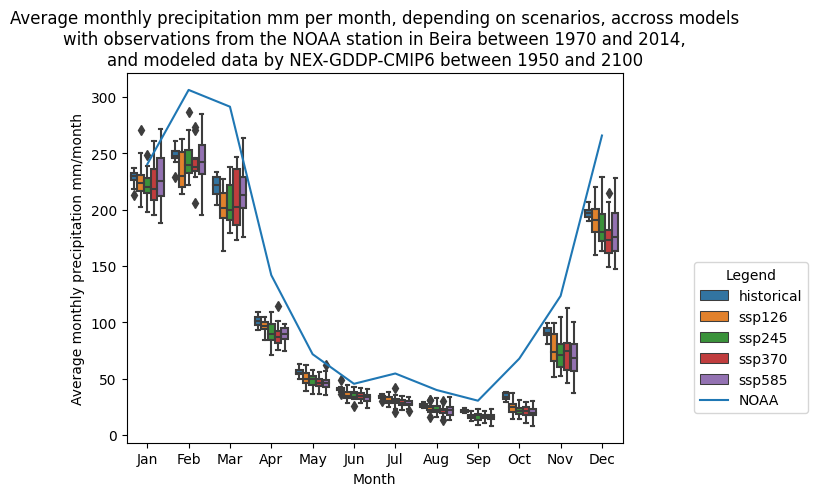

In [29]:
boxplots_line(data_boxplot,data_line,'Month','Average monthly precipitation mm/month','NOAA','Average monthly precipitation mm per month, depending on scenarios, accross models\nwith observations from the NOAA station in Beira between 1970 and 2014,\nand modeled data by NEX-GDDP-CMIP6 between 1950 and 2100',categories='Experiment')

Text(0.5, 1.0, 'Cumulative distribution function of the daily average temperature,\nNOAA observation data between 1970 to 2014 at Beira, MZ')

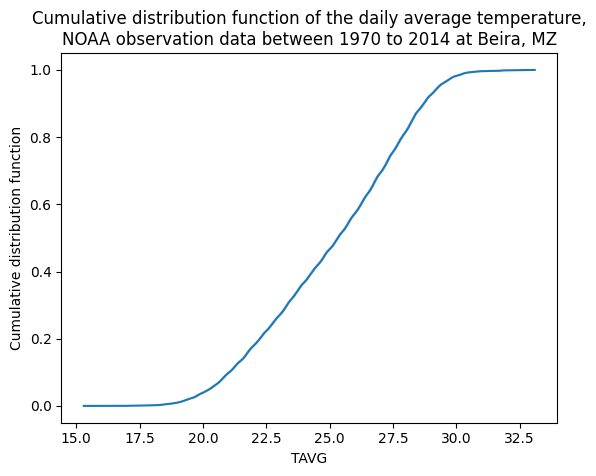

In [71]:
df_obs = daily_sum_obs_from_NOAA_BEIRA[['DATE','TAVG']].sort_values('TAVG',na_position='first').dropna()
df_obs['CDF'] = np.arange(len(df_obs)) / float(len(df_obs))

fig,ax=plt.subplots()
sns.lineplot(data=df_obs,x='TAVG',y='CDF',errorbar =('pi',80))
plt.ylabel('Cumulative distribution function')
plt.title('Cumulative distribution function of the daily average temperature,\nNOAA observation data between 1970 to 2014 at Beira, MZ')


Text(0.5, 1.0, 'Cumulative distribution function of the daily maximum temperature,\nNOAA observation data between 1970 to 2014 at Beira, MZ')

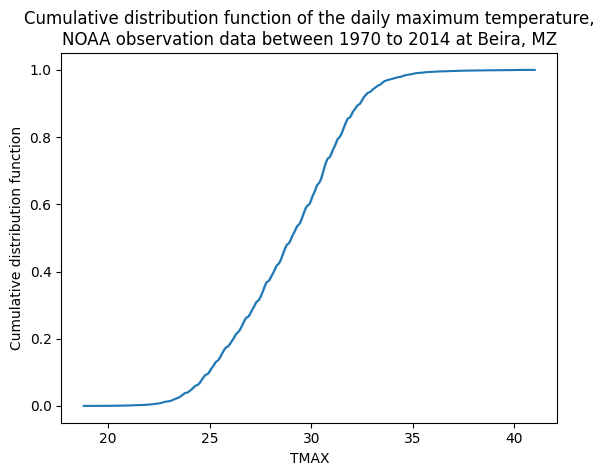

In [72]:
df_obs = daily_sum_obs_from_NOAA_BEIRA_plot[['DATE','TMAX']].sort_values('TMAX',na_position='first').dropna()
df_obs['CDF'] = np.arange(len(df_obs)) / float(len(df_obs))

fig,ax=plt.subplots()
sns.lineplot(data=df_obs,x='TMAX',y='CDF',errorbar =('pi',80))
plt.ylabel('Cumulative distribution function')
plt.title('Cumulative distribution function of the daily maximum temperature,\nNOAA observation data between 1970 to 2014 at Beira, MZ')


In [56]:
min(daily_sum_obs_from_NOAA_BEIRA[['TMAX']].values)

<function max>

In [66]:
daily_sum_obs_from_NOAA_BEIRA_plot[['TMAX']].nlargest(10,'TMAX')

,TMAX
149716,99.0
159323,41.0
147527,40.2
157974,40.1
153212,40.0
156596,40.0
156741,40.0
155590,39.8
157949,39.6
150148,39.5


In [67]:
daily_sum_obs_from_NOAA_BEIRA_plot=daily_sum_obs_from_NOAA_BEIRA.drop(149716)
daily_sum_obs_from_NOAA_BEIRA_plot=daily_sum_obs_from_NOAA_BEIRA_plot.drop(152248)

In [ ]:
# 100 year event for Beira

In [ ]:
Z = daily_sum_obs_from_NOAA_BEIRA[daily_sum_obs_from_NOAA_BEIRA['Year'].between(1991,2012)].groupby('Year')[['PRCP']].agg(np.nanmax)#.values.reshape(len(daily_sum_obs_from_NOAA_CHIMOIO.groupby('Year')[['PRCP']].max().values),)
#Z = Z[~np.isnan(Z)]
(loc1,scale1)=scipy.stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
return_per_100=threshold_coresponding_to_return_period(loc1,scale1,100)
return_per_100